# 1. Machine Learning Methods

In this notebook I'll be exploring the results of the following Machine Learning methods for our fraud detection problem using only their default settings:

* Logistic Regression
* Decision Tree
* Naive Bayes
* KNN

We'll be exploring how they compare against each other and these results will be used as a baseline to be compared against our better methods later

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedShuffleSplit, train_test_split, cross_val_score


import fraudutils as futils
import warnings

warnings.filterwarnings(action='once')

%load_ext autoreload
%autoreload 2
%matplotlib inline

random_state = 1

Our data will be loaded and then splitted into train and test using 80/20 ratio.

In [2]:
cc_df = pd.read_csv('../../../data/raw/creditcard-fraud/creditcard.csv')
X_ = cc_df.drop(['Time', 'Class'], axis=1)
y_ = cc_df['Class'].values

# 60/30/10 split

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.4, random_state=0, stratify=y_)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.25, random_state=0, stratify=y_test)

I'll be comparing classifiers the result of our classifiers applying undersampling and oversampling as shown bellow.

The metrics used below are accuracy, precision and recall, these are defined as:

$$Accuracy = \dfrac{TruePositive + TrueNegative}{TruePositive + FalsePositive + TrueNegative + FalseNegative}$$

$$Precision = \dfrac{TruePositive}{TruePositive + FalsePositive}$$

$$Recall = \dfrac{TruePositive}{TruePositive + TrueNegative}$$

In this analysis I'll be considering fraudulent examples as positives and non-fraudulents as negatives.

With the previous data split, we should have:

In [3]:
print("Train Data:")
print("Non-fraudulent: {}".format(len([x for x in y_train if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_train if x == 1])))

print("\nTest Data:")
print("Non-fraudulent: {}".format(len([x for x in y_test if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_test if x == 1])))

Train Data:
Non-fraudulent: 170589
Fraudulent: 295

Test Data:
Non-fraudulent: 85294
Fraudulent: 148


In [4]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, make_scorer, confusion_matrix, average_precision_score, roc_auc_score

scoring={'recall': make_scorer(recall_score),
         'precision': make_scorer(precision_score),
         'accuracy': make_scorer(accuracy_score),
         'aucpr': make_scorer(average_precision_score),
         'aucroc': make_scorer(roc_auc_score)}

In [5]:
c_scores = {}

### Running Classifiers

Logistic regression results:
Mean accuracy: 0.9991690269422532
Mean precision: 0.8666666666666667
Mean recall: 0.6148648648648649
AUPRC: 0.5335500020982572
AUROC: 0.8073503633537165


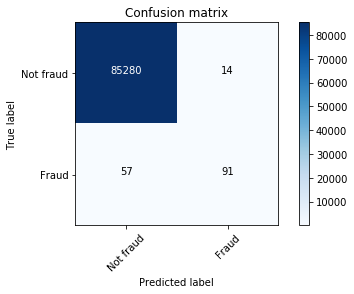


Decision tree results:
Mean accuracy: 0.9991456192504857
Mean precision: 0.7586206896551724
Mean recall: 0.7432432432432432
AUPRC: 0.564284447914319
AUROC: 0.8714164489248316


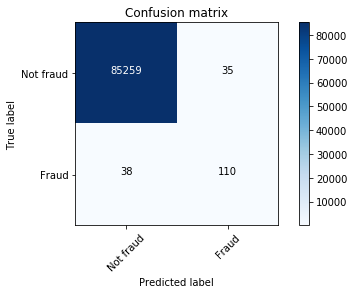


Naive Bayes results:
Mean accuracy: 0.9771657966807893
Mean precision: 0.06088650754992694
Mean recall: 0.8445945945945946
AUPRC: 0.05169360361573769
AUROC: 0.9109952127426979


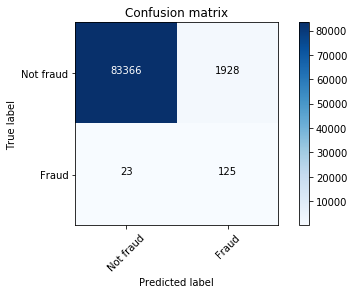


KNN results:
Mean accuracy: 0.9993094730928583
Mean precision: 0.9494949494949495
Mean recall: 0.6351351351351351
AUPRC: 0.6036896107353259
AUROC: 0.8175382571823118


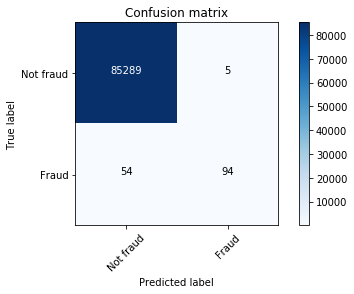

In [6]:
print("Logistic regression results:")
c_scores['logistic_regression'] = futils.classify(X_train, X_test, y_train, y_test, classifier=LogisticRegression(), normalized=False)
#c_scores['logistic_regression'] = futils.stratified_crossvalidation(LogisticRegression, X=X_, y=y_, cv=3, scoring=scoring)
print("\nDecision tree results:")
c_scores['decision_tree'] = futils.classify(X_train, X_test, y_train, y_test, classifier=DecisionTreeClassifier(), normalized=False)
#c_scores['decision_tree'] = futils.stratified_crossvalidation(DecisionTreeClassifier, X=X_, y=y_, cv=3, scoring=scoring)
print("\nNaive Bayes results:")
c_scores['naive_bayes'] = futils.classify(X_train, X_test, y_train, y_test, classifier=GaussianNB(), normalized=False)
#c_scores['naive_bayes'] = futils.stratified_crossvalidation(GaussianNB, X=X_, y=y_, cv=3, scoring=scoring)
print("\nKNN results:")
c_scores['knn'] = futils.classify(X_train, X_test, y_train, y_test, classifier=KNeighborsClassifier(), normalized=False)
#c_scores['knn'] = futils.stratified_crossvalidation(KNeighborsClassifier, X=X_, y=y_, cv=3, scoring=scoring)

## Scores

In [7]:
scores = pd.DataFrame(c_scores)
scores

,logistic_regression,decision_tree,naive_bayes,knn
AUPRC,0.533550,0.564284,0.051694,0.603690
AUROC,0.807350,0.871416,0.910995,0.817538
accuracy,0.999169,0.999146,0.977166,0.999309
precision,0.866667,0.758621,0.060887,0.949495
recall,0.614865,0.743243,0.844595,0.635135
